# K-nearest neighbors and scikit-learn

## Agenda

1. Review of the iris dataset
2. Human learning on the iris dataset
3. K-nearest neighbors (KNN) classification
4. Review of supervised learning
5. Benefits and drawbacks of scikit-learn
6. Requirements for working with data in scikit-learn
7. scikit-learn's 4-step modeling pattern
8. Tuning a KNN model
9. Comparing KNN with other models

## Lesson goals

1. Learn how the modeling process works
2. Learn how scikit-learn works
3. Learn how KNN works

## Review of the iris dataset

In [1]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [ ]:
sns.pairplot(iris)

### Terminology

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

## Human learning on the iris dataset

How did we (as humans) predict the species of an iris?

1. We observe that the different species had (somewhat) dissimilar measurements.
2. We focus on features that seemed to correlate with the response.
3. We create a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** has measurements similar to **previous irises**, then its species is most likely the same as those previous irises.

In [15]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 5

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [8]:
# all features and response need to be numbers for scikit-learn
# map each iris species to a number
species_dict={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = iris['species'].map(species_dict)

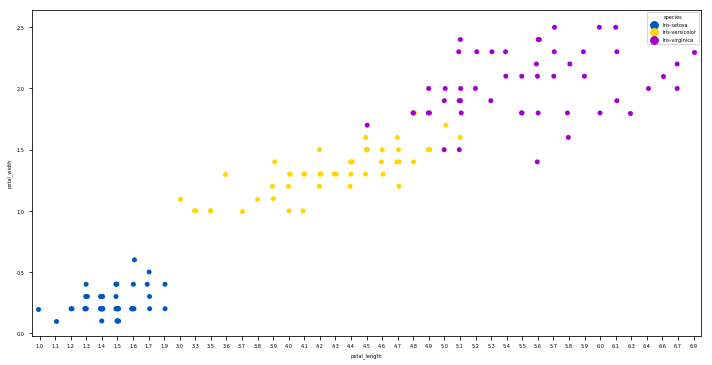

In [19]:
sns.stripplot(x='petal_length',y='petal_width',data=iris,hue='species',jitter=True,palette="prism")

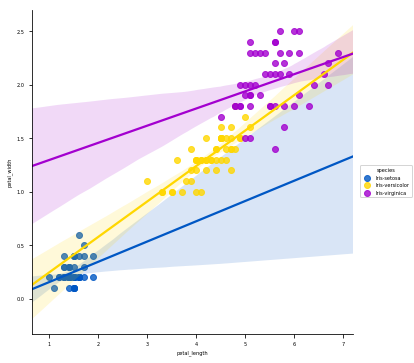

In [21]:
sns.lmplot(x='petal_length',y='petal_width',data=iris,hue='species',palette="prism")

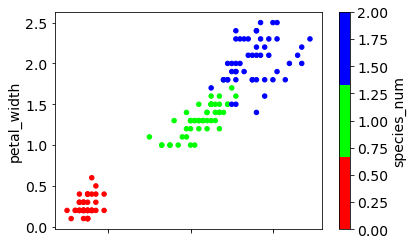

In [10]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold) 

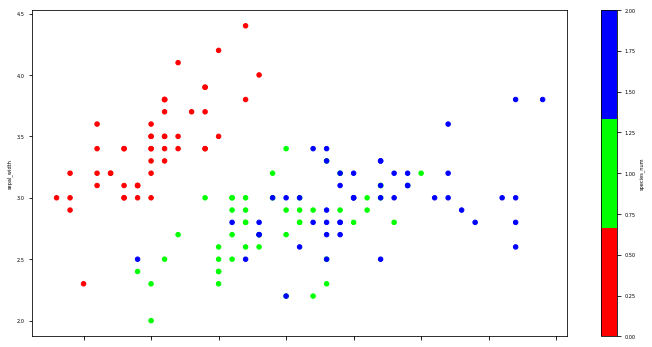

In [22]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

In [30]:
iris[iris.columns[:-2]].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [38]:
iris.columns[:-2]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [39]:
scaler.fit(iris[iris.columns[:-2]])
scaled_iris = scaler.transform(iris[iris.columns[:-2]])
scaled_iris_df = pd.DataFrame(scaled_iris,columns=iris.columns[:-2])

In [40]:
scaled_iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [70]:
scaled_iris_df2=pd.concat([scaled_iris_df.copy(),iris['species_num']],axis=1)
scaled_iris_df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species_num
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


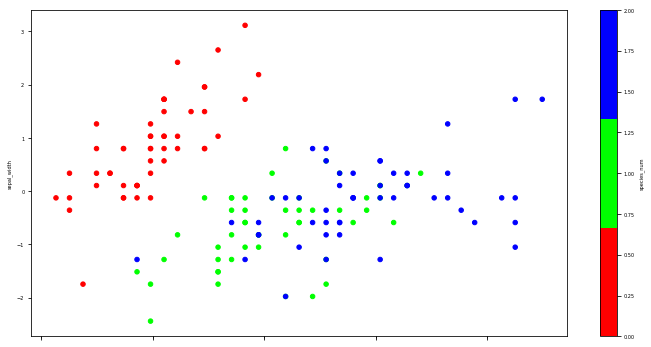

In [71]:
scaled_iris_df2.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

### KNN classification map for iris (K=1)

![1NN classification map](images/iris_01nn_map.png)

### KNN classification map for iris (K=5)

![5NN classification map](images/iris_05nn_map.png)

### KNN classification map for iris (K=15)

![15NN classification map](images/iris_15nn_map.png)

### KNN classification map for iris (K=50)

![50NN classification map](images/iris_50nn_map.png)

**Question:** What's the "best" value for K in this case?

**Answer:** The value which produces the most accurate predictions on **unseen data**. We want to create a model that generalizes!

## Review of supervised learning

![Supervised learning diagram](images/supervised_learning.png)

## Benefits and drawbacks of scikit-learn

**Benefits:**

- Consistent interface to machine learning models
- Provides many tuning parameters but with sensible defaults
- Exceptional documentation
- Rich set of functionality for companion tasks
- Active community for development and support

**Potential drawbacks:**

- Harder (than R) to get started with machine learning
- Less emphasis (than R) on model interpretability

Ben Lorica: [Six reasons why I recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)

## Requirements for working with data in scikit-learn

1. Features and response should be **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily converted to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

## scikit-learn's 6-step modeling pattern
**Step 1:** Create a feature matrix and response vector

**Step 2:** Decide on the estimator you want to to use and import that class

**Step 3:** "Instantiate" the "estimator"

**Step 4:** Fit the model with data (aka "model training")

**Step 5:** Use the model to predict the response for a new observation

**Step 6:** Evaluate the error or accuracy of the model


## Let's utilize scikit-learn's 6-step modeling pattern
(We will explore evaluating accuracy next lesson)

**Step 1:** Create a feature matrix and response vector

In [41]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


In [ ]:
# all features and response need to be numbers for scikit-learn
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [ ]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
print (X)

In [ ]:
# alternative ways to create "X"
X = iris.drop(['species', 'species_num'], axis=1)
X = iris.loc[:, 'sepal_length':'petal_width']
X = iris.iloc[:, 0:4]

In [ ]:
# store response vector in "y"
y = iris.species_num
print(y)

In [ ]:
# check X's type
print type(X)
print type(X.values)

In [ ]:
# check y's type
print type(y)
print type(y.values)

In [ ]:
# check X's shape (n = number of observations, p = number of features)
print X.shape

In [ ]:
# check y's shape (single dimension with length n)
print y.shape

In [46]:
X=scaled_iris_df

In [50]:
y=iris['species_num']

In [44]:
print(type(X.values))

<class 'numpy.ndarray'>


**Step 2:** Decide on the estimator you want to to use and import that class
- "Estimator" is scikit-learn's term for "model"
- [See scikit-learn flowchart that aids estimator choice decisions](http://3.bp.blogspot.com/-dofu6J0sZ8o/UrctKb69QdI/AAAAAAAADfg/79ewPecn5XU/s1600/scikit-learn-flow-chart.jpg)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

**Step 3:** "Instantiate" the "estimator"

- "Instantiate" means "make an instance of"

In [78]:
# make an instance of a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

- Created an object that "knows" how to do K-nearest neighbors classification, and is just waiting for data
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [53]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


**Step 4:** Fit the model with data (aka "model training")

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Occurs in-place

In [54]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

- Once a model has been fit with data, it's called a "fitted model"

##### **Step 5:** Use the model to predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [58]:
# Since we used all our data to create the model, let's create a hypothetical new observation to see the prediction
new_observation = [[3, 5, 4, 2]]
knn.predict(new_observation)

array([2])

In [59]:
# Since we used all our data to create the model, let's create a hypothetical new observation to see the prediction
new_observation = [[3, 5, 4, 2],[4,1, 5,7]]
knn.predict(new_observation)

array([2, 2])

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observations at once

In [75]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 2])

## Tuning a KNN model

In [61]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([2, 2])

**Question:** Which model produced the correct predictions for the two unknown irises?

**Answer:** We don't know, because these are **out-of-sample observations**, meaning that we don't know the true response values. Our goal with supervised learning is to build models that generalize to out-of-sample data. However, we can't truly measure how well our models will perform on out-of-sample data.

**Question:** Does that mean that we have to guess how well our models are likely to do?

**Answer:** Thankfully, no. In the next class, we'll discuss **model evaluation procedures**, which allow us to use our existing labeled data to estimate how well our models are likely to perform on out-of-sample data. These procedures will help us to tune our models and choose between different types of models.

In [77]:
# calculate predicted probabilities of class membership
# the probability of being each type
knn.predict_proba(X_new)

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

## Comparing KNN with other models

**Advantages of KNN:**

- Simple to understand and explain
- Model training is fast
- Can be used for classification and regression

**Disadvantages of KNN:**

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data (for some distance metric options)
- Accuracy is (generally) not competitive with the best supervised learning methods

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [80]:
knn = KNeighborsClassifier(n_neighbors=1)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [82]:
prediction=knn.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(prediction,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.82      1.00      0.90        14
          2       1.00      0.85      0.92        20

avg / total       0.95      0.93      0.93        45

